<a href="https://colab.research.google.com/github/eireford/ConwayLifeTensorFlow/blob/master/LTF_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Life on TensorFlow

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time
import numpy as np
import scipy.signal

In [0]:
def default_config():
  return { 
      'grid_shape':  [512,512],
      # for reproducability reuse seed
      'seed': 1000,
      'preferred_size_inches': 18.02
   }

In [0]:
def random_uniform_grid(shape,seed):
  return tf.round(tf.random.uniform(shape=shape,dtype=tf.float32, seed=seed))

Use the default configuration and generate a grid of cells, randomly alive or dead.

In [0]:
config = default_config()
grid_shape, seed, preferred_size_inches, = config.values()
grid = random_uniform_grid(grid_shape,seed)

Display the grid

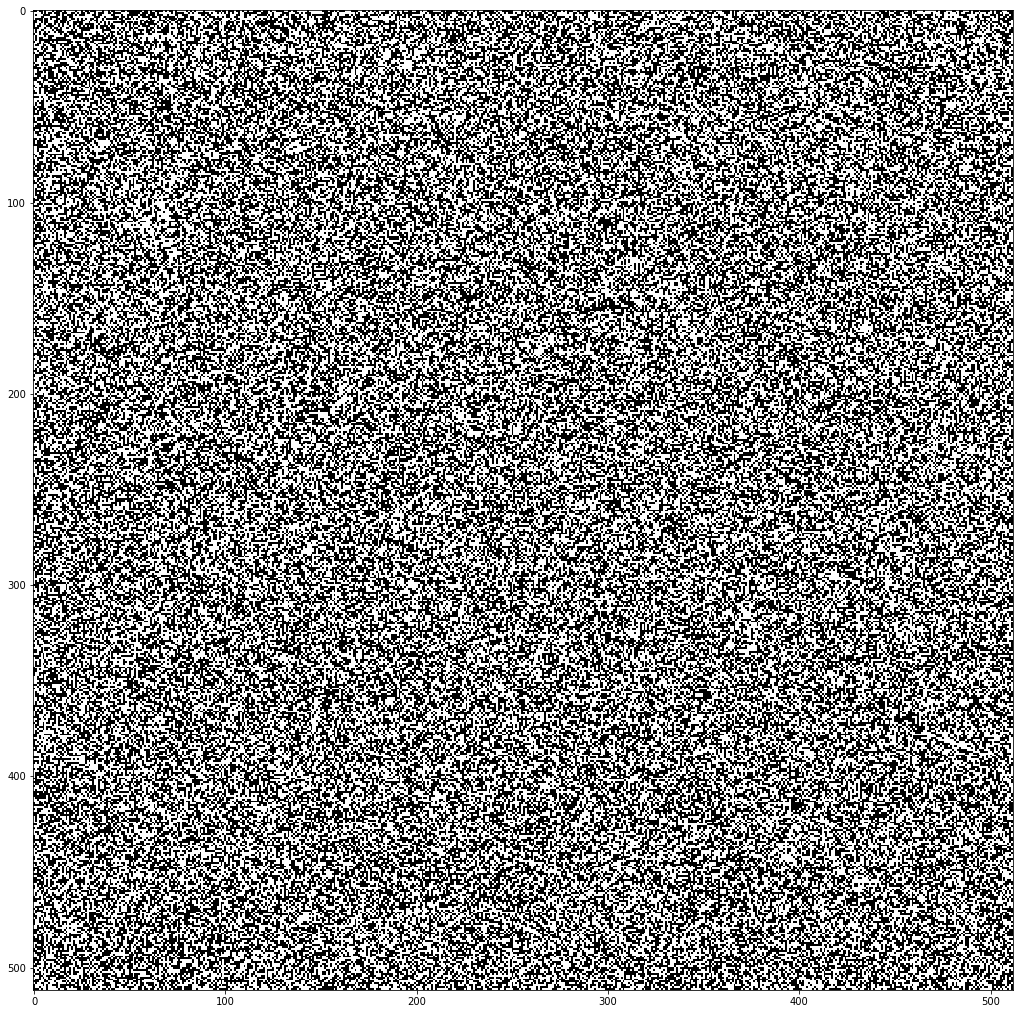

In [6]:
plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
figure_1 = plt.imshow(grid,cmap='Greys',origin='upper',interpolation='nearest')

In [7]:
alive_total = tf.reduce_sum(grid)
ratio_alive = alive_total/(grid_shape[0]*grid_shape[1])
print("alive_total",int(alive_total))
print("alive_percent",float(ratio_alive*100))

alive_total 130946
alive_percent 49.951934814453125


In [0]:
livable_filter_tf = tf.constant([
                                [1,1,1],
                                [1,10,1],
                                [1,1,1]
                                ],dtype=tf.float32)

In [0]:
def convolve_for_density_tf(x):
  v = tf.reshape(livable_filter_tf, [3,3,1,1])
  a = tf.reshape(x,[1,grid_shape[0],grid_shape[1],1])
  denisty_map = tf.reshape(tf.nn.conv2d(a,v,[1,1,1,1],"SAME"),grid_shape)
  return denisty_map  

In [0]:
livable_filter_sp = [[1,1,1],[1,10,1],[1,1,1]]

In [0]:
def convolve_for_density_sp(x):
  v = tf.reshape(livable_filter_sp, [3,3,1,1]).numpy()
  a = tf.reshape(x,[1,grid_shape[0],grid_shape[1],1])
  denisty_map = scipy.signal.convolve2d(x,livable_filter_sp,"same")
  return denisty_map  

In [0]:
def liveness_test(x):
  return tf.cast(tf.where(((x == 3)|(x == 12)|(x == 13)),1,0),dtype=tf.float32)

In [0]:
#running_state = convolve_for_density(grid)
#tf.print(running_state,summarize=-1)
#plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
#figure_2 = plt.imshow(tf.slice(running_state,(0,0),(grid_shape[0],grid_shape[1])),cmap='Greys',origin='upper',interpolation='nearest')

In [0]:
def population_report(x):
  alive_total = tf.reduce_sum(x)
  ratio_alive = alive_total/(grid_shape[0]*grid_shape[1])
  return "alive_total:" + str(int(alive_total)) + " alive_percent:" + str(float(ratio_alive*100))

In [0]:
def run_scipy(running_state,iterations = 20): 
  for i in range(iterations):
    if i%(iterations//20) == 0:
      print("step:",i,population_report(running_state))
    running_state = convolve_for_density_sp(running_state)
    running_state = liveness_test(running_state)
  return running_state

In [0]:
def run_tf(running_state,iterations = 20): 
  for i in range(iterations):
    if i%(iterations//20) == 0:
      print("step:",i,population_report(running_state))
    running_state = convolve_for_density_tf(running_state)
    running_state = liveness_test(running_state)
  return running_state

In [17]:
%time final_state_tf = run_tf(grid,10000)

step: 0 alive_total:130946 alive_percent:49.951934814453125
step: 500 alive_total:13843 alive_percent:5.2806854248046875
step: 1000 alive_total:10633 alive_percent:4.0561676025390625
step: 1500 alive_total:9302 alive_percent:3.548431396484375
step: 2000 alive_total:8800 alive_percent:3.35693359375
step: 2500 alive_total:8298 alive_percent:3.165435791015625
step: 3000 alive_total:7774 alive_percent:2.965545654296875
step: 3500 alive_total:7538 alive_percent:2.875518798828125
step: 4000 alive_total:7541 alive_percent:2.8766632080078125
step: 4500 alive_total:7524 alive_percent:2.87017822265625
step: 5000 alive_total:7293 alive_percent:2.7820587158203125
step: 5500 alive_total:7307 alive_percent:2.7873992919921875
step: 6000 alive_total:7274 alive_percent:2.774810791015625
step: 6500 alive_total:7274 alive_percent:2.774810791015625
step: 7000 alive_total:7274 alive_percent:2.774810791015625
step: 7500 alive_total:7274 alive_percent:2.774810791015625
step: 8000 alive_total:7274 alive_perce

In [18]:
%time final_state_sp = run_scipy(grid,10000)

step: 0 alive_total:130946 alive_percent:49.951934814453125
step: 500 alive_total:13843 alive_percent:5.2806854248046875
step: 1000 alive_total:10633 alive_percent:4.0561676025390625
step: 1500 alive_total:9302 alive_percent:3.548431396484375
step: 2000 alive_total:8800 alive_percent:3.35693359375
step: 2500 alive_total:8298 alive_percent:3.165435791015625
step: 3000 alive_total:7774 alive_percent:2.965545654296875
step: 3500 alive_total:7538 alive_percent:2.875518798828125
step: 4000 alive_total:7541 alive_percent:2.8766632080078125
step: 4500 alive_total:7524 alive_percent:2.87017822265625
step: 5000 alive_total:7293 alive_percent:2.7820587158203125
step: 5500 alive_total:7307 alive_percent:2.7873992919921875
step: 6000 alive_total:7274 alive_percent:2.774810791015625
step: 6500 alive_total:7274 alive_percent:2.774810791015625
step: 7000 alive_total:7274 alive_percent:2.774810791015625
step: 7500 alive_total:7274 alive_percent:2.774810791015625
step: 8000 alive_total:7274 alive_perce

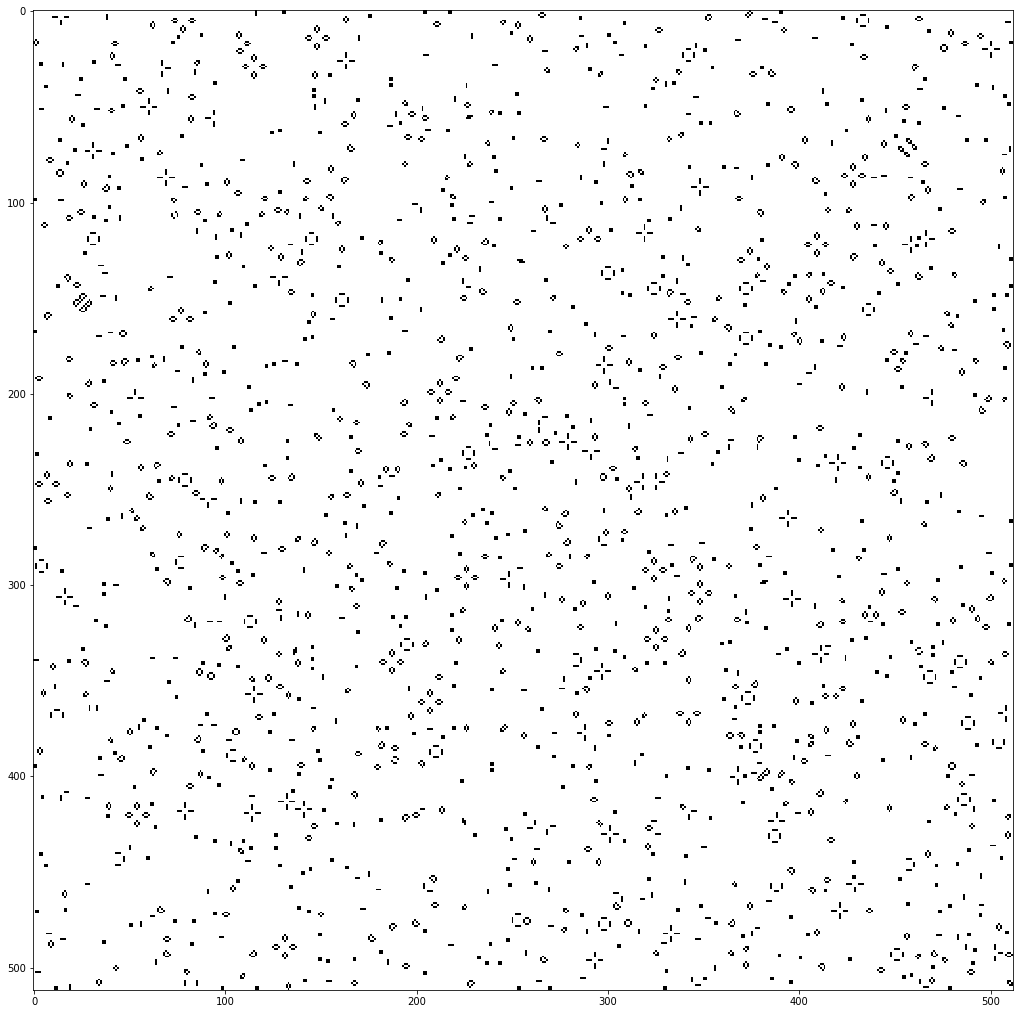

In [19]:
plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
figure_3 = plt.imshow(final_state_tf,cmap='Greys',origin='upper',interpolation='nearest') 

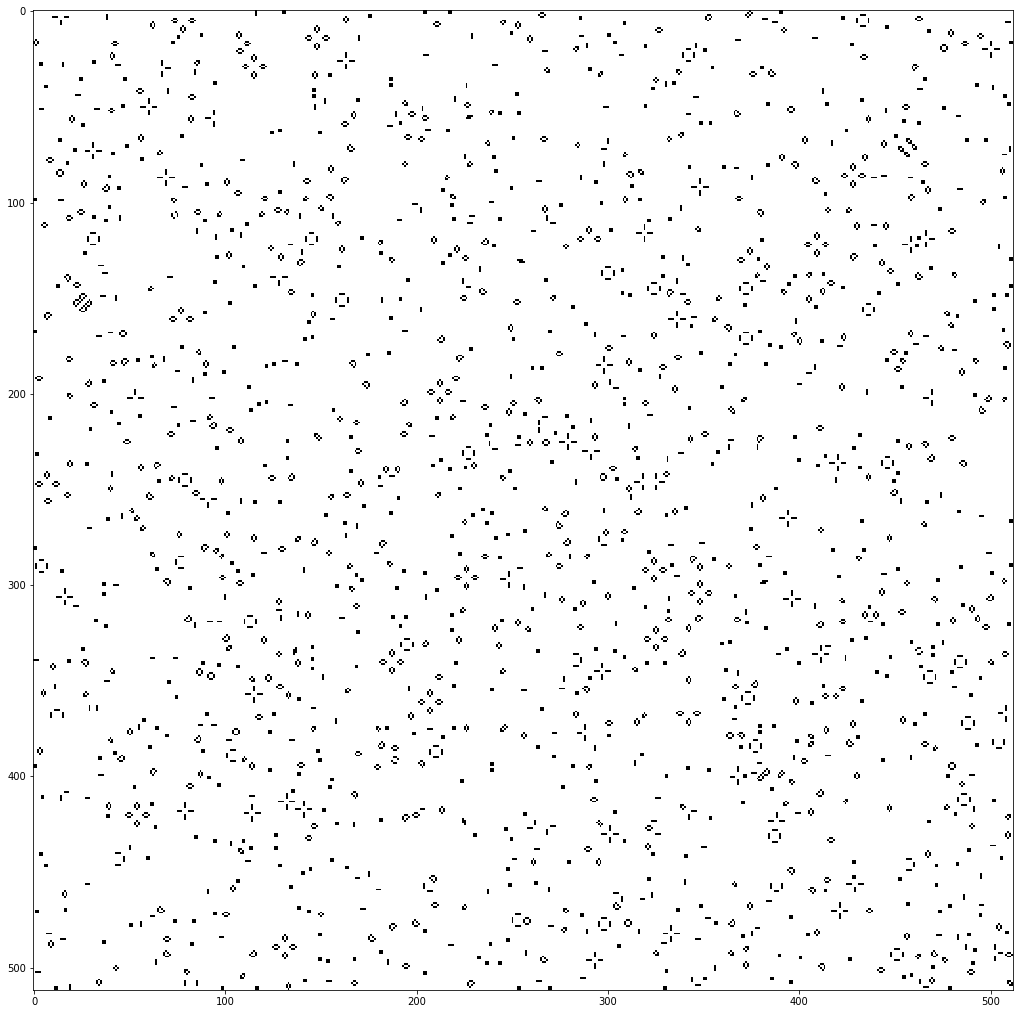

In [20]:
plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
figure_3 = plt.imshow(final_state_sp,cmap='Greys',origin='upper',interpolation='nearest') 

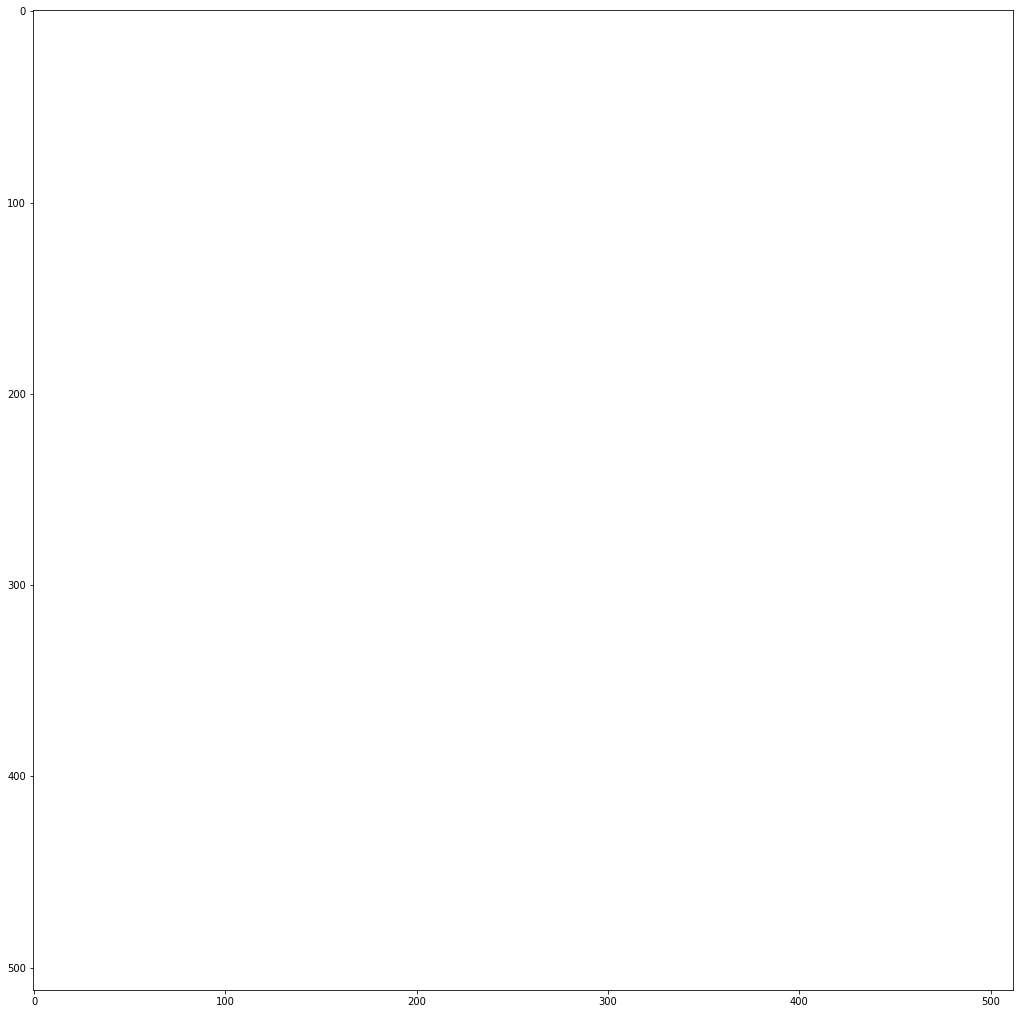

In [22]:
plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
figure_3 = plt.imshow(final_state_sp - final_state_tf,cmap='Greys',origin='upper',interpolation='nearest') 